In [1]:
from PIL import Image,ImageEnhance
import cv2
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display


Đầu tiên chúng ta xác định 1 vài thông số của ảnh

In [2]:
def print_image_info(image):
    try:
        with Image.open(image) as img:
            # Lấy thông tin ảnh
            image_info = img.info
            # Lấy kích thước ảnh
            width, height = img.size
            # Lấy chế độ màu
            mode = img.mode

            print(f"Thông tin ảnh '{image}':")
            print(f"Kích thước: {width} x {height} pixels")
            print(f"Chế độ màu: {mode}")
            print(f"Thông tin thêm: {image_info}")

    except Exception as e:
        print(f"Lỗi: {e}")

image = "1.png"
print_image_info(image)

Thông tin ảnh '1.png':
Kích thước: 512 x 384 pixels
Chế độ màu: P
Thông tin thêm: {}


Tiến hành covert ảnh về mode RGB

In [3]:
def change_image_mode(input_image_path, output_image_path, new_mode):
    # Load ảnh
    original_image = Image.open(input_image)

    # Thay đổi mode của ảnh
    converted_image = original_image.convert(new_mode)

    # Lưu ảnh sau khi thay đổi mode
    converted_image.save(output_image)

input_image = "1.png"
output_image = "Converted_Mode.png"

new_image_mode = 'RGB'

change_image_mode(input_image, output_image, new_image_mode)


Đầu tiên khi nhìn vào ảnh, điều dễ dàng nhận thấy nhất là ảnh hơi bị tối ở các chi tiết như lá cây, thân cây. Nguyên nhân chính là do các giá trị trong mỗi pixel của ảnh đang khá gần với giá trị 0. Độ tương phản (contrast) đang thấp. Để cải thiện chất lượng ảnh thì ta cần tăng độ tương phản.

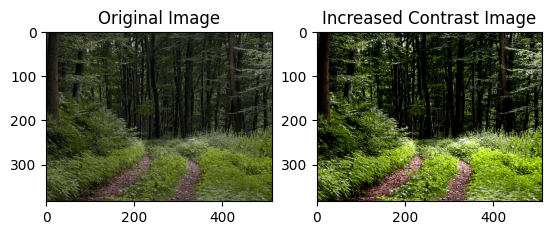

In [4]:
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt

def increase_contrast(input_image, output_image, factor):
    original_image = Image.open(input_image)

    # Tăng cường độ tương phản
    enhancer = ImageEnhance.Contrast(original_image)
    contrast_image = enhancer.enhance(factor)

    # Lưu ảnh
    contrast_image.save(output_image)

    return original_image, contrast_image

def show_comparison(original_image, contrast_image):
    # Hiển thị ảnh gốc và ảnh đã được tăng cường độ tương phản
    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(contrast_image)
    plt.title('Increased Contrast Image')

    plt.show()

input_image = "Converted_Mode.png"
output_image = "Increased_Contrast.png"
# Hệ số tăng cường độ tương phản
contrast_factor = 2
original_image, contrast_image = increase_contrast(input_image, output_image, contrast_factor)

# Hiển thị ảnh gốc và ảnh đã được tăng cường độ tương phản
show_comparison(original_image, contrast_image)


Sau khi bức ảnh đã sáng hơn, các chi tiết cũng dễ nhận ra hơn. Nhưng vấn đề là ta đang thấy chúng bị nhiễu, trông chúng không thật sự rõ ràng. Có thể do độ phân giải chưa phù hợp. Ta có thể thay đổi độ phân giải của ảnh.

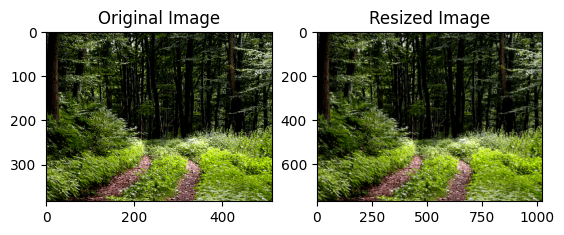

In [5]:
def enhance_resolution(input_path, output_path):
    img = cv2.imread(input_path)

    # Tăng độ phân giải
    new_width, new_height = img.shape[1] * 2, img.shape[0] * 2
    img_resized = cv2.resize(img, (new_width, new_height))

    # Lưu ảnh
    cv2.imwrite(output_path, img_resized)

    return img, img_resized
    
input_image_path = "Increased_Contrast.png"
output_image_path = "Resized_Image.png"

original_image, resized_image = enhance_resolution(input_image_path, output_image_path)

# Hiển thị ảnh gốc và ảnh đã resize
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.title('Resized Image')

plt.show()


Tăng chi tiết ảnh

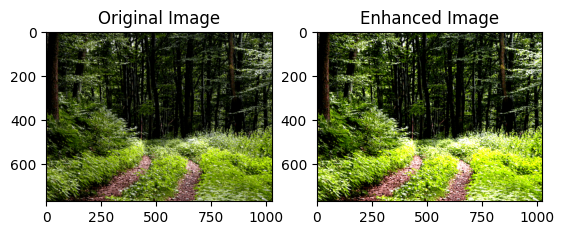

In [6]:
def enhance_details(input_path, output_path):
    img = cv2.imread(input_path)
    
    if img is None:
        print(f"Không thể đọc ảnh từ đường dẫn: {input_path}")
        return None

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    laplacian = cv2.Laplacian(gray, cv2.CV_64F)
    sharpness = cv2.convertScaleAbs(laplacian)
    enhanced_image = cv2.addWeighted(img, 1.5, cv2.cvtColor(sharpness, cv2.COLOR_GRAY2BGR), -0.5, 0)

    # Lưu ảnh đã được làm tăng chi tiết
    cv2.imwrite(output_path, enhanced_image)

    return img, enhanced_image

input_image_path = "Resized_Image.png"
output_image_path = "Enhanced_Details.png"

original_image, enhanced_image = enhance_details(input_image_path, output_image_path)

# Hiển thị ảnh gốc và ảnh đã được làm tăng chi tiết để so sánh
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
plt.title('Enhanced Image')

plt.show()

Có vẻ như bức ảnh của chúng ta đang có sự mất cân bằng về độ sáng. Bằng mắt thường ta có thể thấy bên ngoài hơi chói ( các giá trị pixel gần với 255), và bên trong quá tối, thậm chí các chi tiết như thân cây là màu đen ( giá trị pixel sát với 0 ). Ta tiến hành cân bằng độ sáng cho bức ảnh bằng cách áp dụng Histogram Equalization.

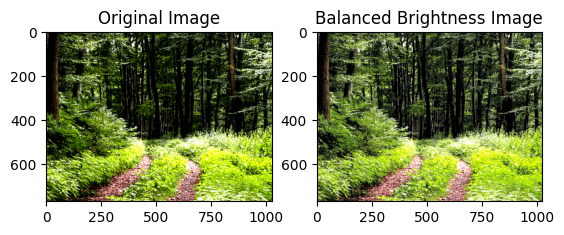

In [7]:
def balance_brightness(input_path, output_path):
    img = cv2.imread(input_path)

    # Chuyển ảnh sang không gian màu LAB
    lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

    # Áp dụng Histogram Equalization cho kênh L (độ sáng)
    lab_img[:, :, 0] = cv2.equalizeHist(lab_img[:, :, 0])

    # Chuyển trở lại không gian màu BGR
    equalized_img = cv2.cvtColor(lab_img, cv2.COLOR_LAB2BGR)

    # Lưu ảnh đã được cân bằng độ sáng
    cv2.imwrite(output_path, equalized_img)

    return img, equalized_img

input_image_path = "Enhanced_Details.png"
output_image_path = "Balance.png"

original_image, balanced_image = balance_brightness(input_image_path, output_image_path)

# Hiển thị ảnh gốc và ảnh đã được cân bằng độ sáng để so sánh
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(balanced_image, cv2.COLOR_BGR2RGB))
plt.title('Balanced Brightness Image')

plt.show()

